# Решение с помощью scipy

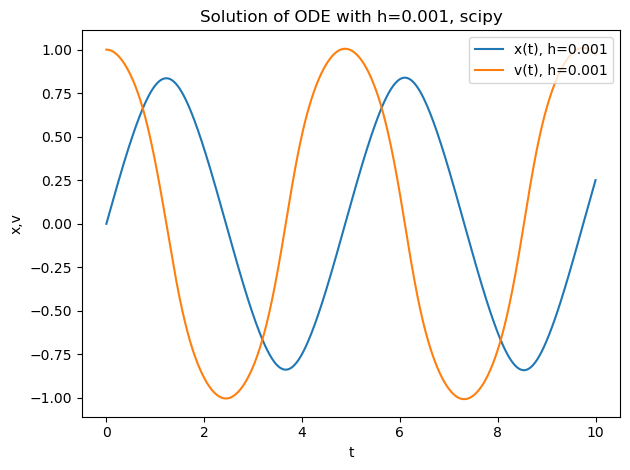

In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def f(t, y):
    x, v = y
    dxdt = v
    dvdt = -1/1.67*(2*x + 2*x*np.tan(x**2)**2)
    return [dxdt, dvdt]

y0 = [0, 1] 
t_span = [0, 10] 

h_values = [0.001]

for i, h in enumerate(h_values):
    t_eval = np.arange(t_span[0], t_span[1]+h, h)
    solution = solve_ivp(f, t_span, y0, method='RK45', t_eval=t_eval)
    plt.plot(solution.t, solution.y[0], label=f'x(t), h={h}')
    plt.plot(solution.t, solution.y[1], label=f'v(t), h={h}')
    plt.xlabel('t')
    plt.ylabel('x,v')
    plt.title(f'Solution of ODE with h={h}, scipy')
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


# Разность решений между РК4 и самодельного Эйлера

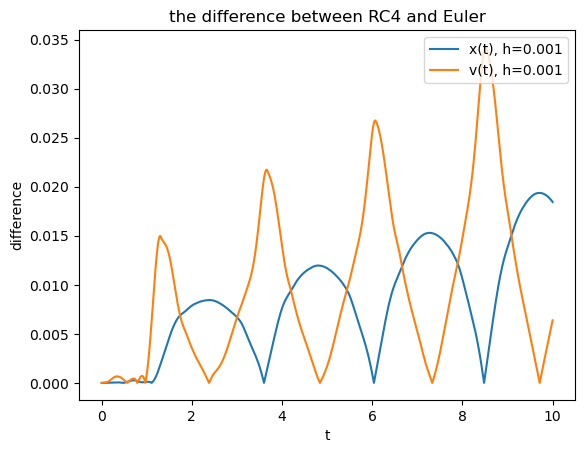

In [5]:
Edata1 = np.loadtxt('X1_out.csv')
Ex_t = Edata1[1113:, 0]
Ex = Edata1[1113:, 1]

Edata2 = np.loadtxt('V1_out.csv')
Ev_t = Edata2[1113:, 0]
Ev = Edata2[1113:, 1]

common_x = abs(Ex - solution.y[0])
common_v = abs(Ev - solution.y[1])
plt.plot(Ex_t, common_x, label=f'x(t), h={0.001}')
plt.plot(Ev_t, common_v, label=f'v(t), h={0.001}')
plt.xlabel('t')
plt.ylabel('difference')
plt.title('the difference between RC4 and Euler')
plt.legend(loc='upper right')

# Разность решений между РК4 и самодельного Адамса

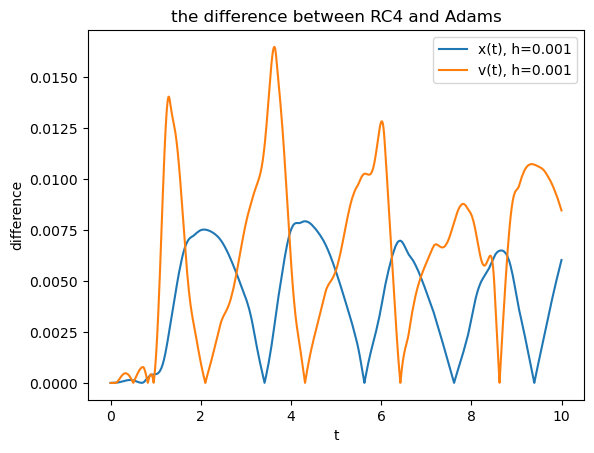

In [54]:
Adata1 = np.loadtxt('X2_out.csv')
Ax_t = Adata1[1113:, 0]
Ax = Adata1[1113:, 1]

Adata2 = np.loadtxt('V2_out.csv')
Av_t = Adata2[1113:, 0]
Av = Adata2[1113:, 1]

common_x = abs(Ax - solution.y[0])
common_v = abs(Av - solution.y[1])
plt.plot(Ax_t, common_x, label=f'x(t), h={0.001}')
plt.plot(Av_t, common_v, label=f'v(t), h={0.001}')
plt.xlabel('t')
plt.ylabel('difference')
plt.title('the difference between RC4 and Adams')
plt.legend(loc='upper right')

# Разность решений самоделок Эйлера и Адамса

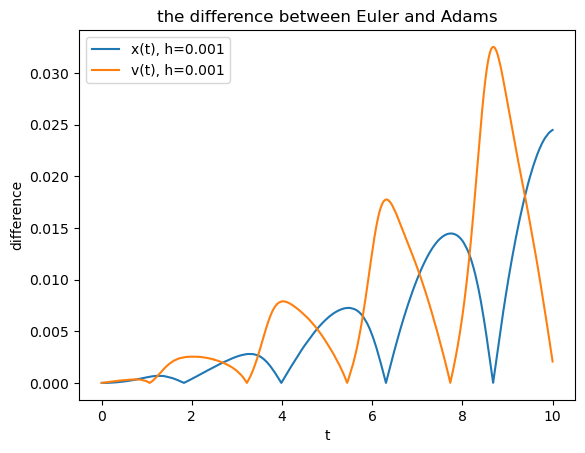

In [56]:
common_x = abs(Ax - Ex)
common_v = abs(Av - Ev)
plt.plot(x_t, common_x, label=f'x(t), h={0.001}')
plt.plot(v_t, common_v, label=f'v(t), h={0.001}')
plt.xlabel('t')
plt.ylabel('difference')
plt.title('the difference between Euler and Adams')
plt.legend(loc='upper left')

# Разность решений между РК4 и самодельного РК4

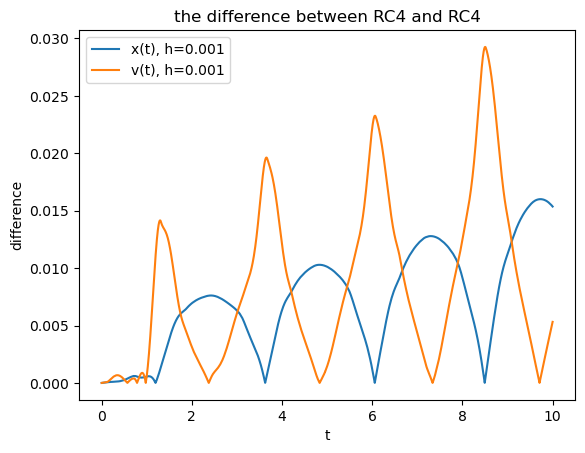

In [10]:
Rdata1 = np.loadtxt('X3_out.csv')
Rx_t = Rdata1[1113:, 0]
Rx = Rdata1[1113:, 1]

Rdata2 = np.loadtxt('V3_out.csv')
Rv_t = Rdata2[1113:, 0]
Rv = Rdata2[1113:, 1]

common_x = abs(Rx - solution.y[0])
common_v = abs(Rv - solution.y[1])
plt.plot(Rx_t, common_x, label=f'x(t), h={0.001}')
plt.plot(Rv_t, common_v, label=f'v(t), h={0.001}')
plt.xlabel('t')
plt.ylabel('difference')
plt.title('the difference between RC4 and RC4')
plt.legend(loc='upper left')

# Решение краевой задачи с помощью scipy

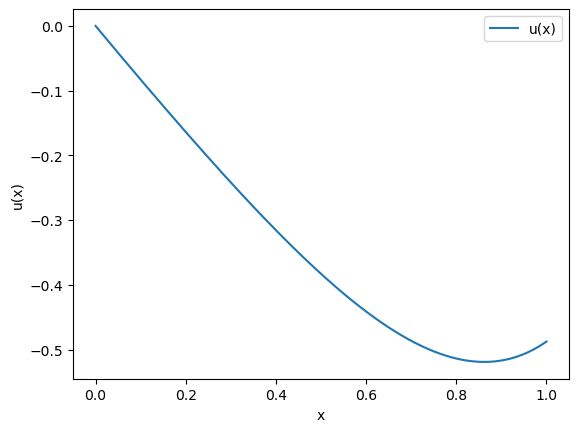

In [2]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

def ode(x, y):
    return np.vstack((y[1], np.cosh(2*x) + y[1]))

def bc(ya, yb):
    return np.array([ya[0], yb[0]+yb[1]])

a = 0
b = 1
x = np.linspace(a, b, 10001)
y = np.zeros((2, x.size))

sol = solve_bvp(ode, bc, x, y)

x_plot = np.linspace(a, b, 10001)
y_plot = sol.sol(x_plot)[0]

plt.plot(x_plot, y_plot, label='u(x)')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.show()


# Разность решений между краевой задачи с scipy и самодельного метода

Text(0.5, 1.0, 'the difference between scipy and my solution')

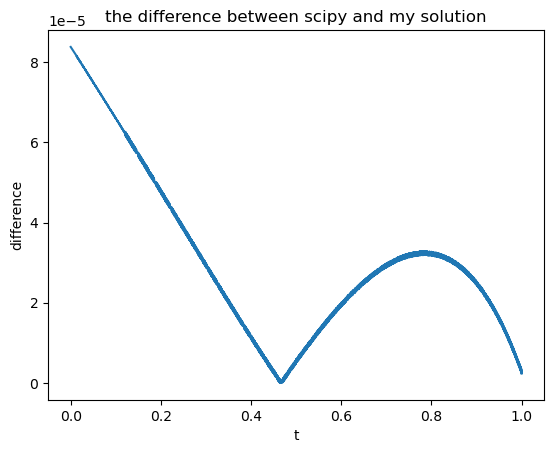

In [13]:
Sdata1 = np.loadtxt('X4_out.csv')
Su_t = Sdata1[1113:, 0]
Su = Sdata1[1113:, 1]

common_u = abs(Su - y_plot)
plt.plot(Su_t, common_u)
plt.xlabel('t')
plt.ylabel('difference')
plt.title('the difference between scipy and my solution')

# Разница между метода стрельбы и scipy

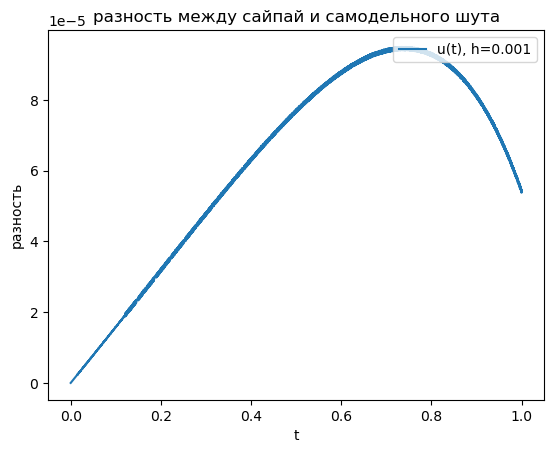

In [5]:
Edata1 = np.loadtxt('X5_out.csv')
Ex_t = Edata1[:, 0]
Ex = Edata1[:, 1]

common_u = abs(Ex - y_plot)

plt.plot(Ex_t, common_u, label=f'u(t), h={0.001}')
plt.xlabel('t')
plt.ylabel('разность')
plt.title('разность между сайпай и самодельного шута')
plt.legend(loc='upper right')